In [8]:
from openai import OpenAI
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

In [9]:
openai_api_key = os.getenv('OPENAI_API_KEY')
client = OpenAI(api_key=openai_api_key)

In [10]:
def get_embedding(text: str) -> list:
    """
    최신 OpenAI 임베딩 API를 사용하여 텍스트의 임베딩 벡터를 반환합니다.
    """
    response = client.embeddings.create(
        model="text-embedding-ada-002",
        input=text,
        encoding_format="float"
    )
    return response.data[0].embedding

In [14]:
def load_csv_and_generate_embeddings(csv_path: str) -> pd.DataFrame:
    """
    CSV 파일을 로드하고, coordinate 컬럼은 제외한 나머지 정보를 결합하여 임베딩을 생성합니다.
    - 결합 대상: name, information, region, writter
    - 카테고리 컬럼(값이 1인 경우만)을 결합하여 포함 (painting, potery, royal, impressionist, furniture,
      religion, buda, shamanism, Christianus, korea, hindu, egyptian, natural history, fossil, dinosaur, animal, mineral)
    """
    df = pd.read_csv(csv_path)
    print("CSV 파일의 컬럼:", df.columns.tolist())
    
    category_cols = [
        "painting", "potery", "royal", "impressionist", "furniture", 
        "religion", "buda", "shamanism", "Christianus", "korea", 
        "hindu", "egyptian", "natural history", "fossil", "dinosaur", 
        "animal", "mineral"
    ]
    
    def combine_info(row):
        base_info = (
            f"name: {row['name']}\n"
            f"information: {row['information']}\n"
            f"region: {row['region']}\n"
            f"writter: {row['writter']}\n"
        )
        active_categories = [cat for cat in category_cols if row[cat] == 1]
        if active_categories:
            base_info += "categories: " + ", ".join(active_categories)
        return base_info
    
    df["combined_text"] = df.apply(combine_info, axis=1)
    df["embedding"] = df["combined_text"].apply(get_embedding)
    
    return df

In [15]:
def plot_2d_embeddings(df: pd.DataFrame):
    """
    임베딩 벡터들을 PCA로 2차원 축소하여 산점도와 작품 이름 라벨을 표시합니다.
    """
    embeddings = df["embedding"].tolist()
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    df["pca_x"] = embeddings_2d[:, 0]
    df["pca_y"] = embeddings_2d[:, 1]
    
    plt.figure(figsize=(10, 8))
    plt.scatter(df["pca_x"], df["pca_y"], alpha=0.7)
    for _, row in df.iterrows():
        plt.text(row["pca_x"], row["pca_y"], str(row["name"]), fontsize=8)
    plt.title("임베딩 공간 (PCA 2D)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

In [16]:
def plot_3d_embeddings(df: pd.DataFrame):
    """
    임베딩 벡터들을 PCA로 3차원 축소하여 3D 산점도와 작품 이름 라벨을 표시합니다.
    """
    embeddings = df["embedding"].tolist()
    pca = PCA(n_components=3)
    embeddings_3d = pca.fit_transform(embeddings)
    df["pca_x"] = embeddings_3d[:, 0]
    df["pca_y"] = embeddings_3d[:, 1]
    df["pca_z"] = embeddings_3d[:, 2]
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df["pca_x"], df["pca_y"], df["pca_z"], alpha=0.7)
    for _, row in df.iterrows():
        ax.text(row["pca_x"], row["pca_y"], row["pca_z"], str(row["name"]), fontsize=8)
    ax.set_title("임베딩 공간 (PCA 3D)")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_zlabel("PCA 3")
    plt.show()

CSV 파일의 컬럼: ['name', 'coordinate', 'information', 'region', 'writter', 'painting', 'potery', 'royal', 'impressionist', 'furniture', 'religion', 'buda', 'shamanism', 'Christianus', 'korea', 'hindu', 'egyptian', 'natural history', 'fossil', 'dinosaur', 'animal', 'mineral']
임베딩 생성 완료. DataFrame 미리보기:
                                                name  \
0            Gyeongbokgung_Manchunjeon_Foldingscreen   
1                                       Ilwolobongdo   
2  Celadon Prunus Vase with Inlaid Chrysanthemum,...   
3                  Gold Crown From Cheonmachong Tomb   
4                     Unhyun_ White Porcelain Bottle   

                 coordinate  \
0  (0.63699,-20.64571,0.03)   
1        (0.61085,-9.2,0.0)   
2      (-24.0,-8.66634,1.0)   
3    (24.01586,-7.9648,1.5)   
4     (-24.0,-14.83924,1.0)   

                                         information region writter  painting  \
0  Foldingscreen It is one of the props reproduce...   east     NaN       1.0   
1  Ilwolobongdo

/home/usr/.conda/envs/ex/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/usr/.conda/envs/ex/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/usr/.conda/envs/ex/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/usr/.conda/envs/ex/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/usr/.conda/envs/ex/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing fro

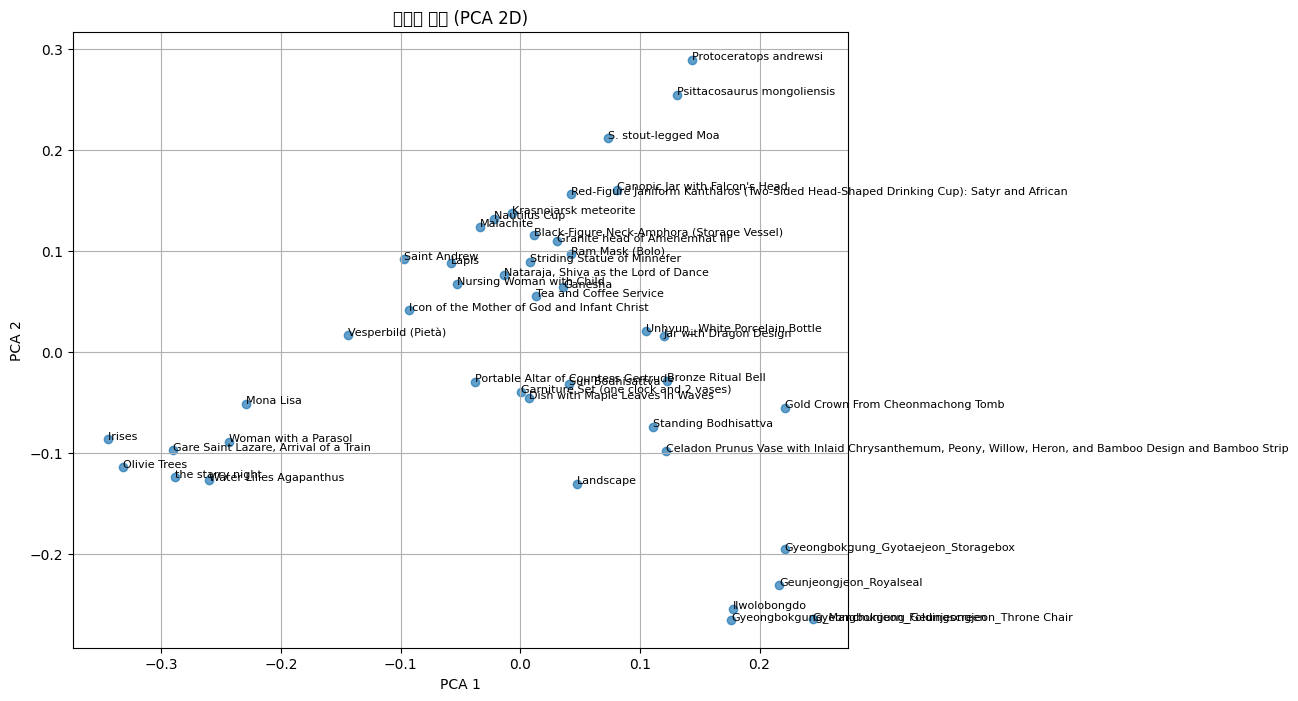

/home/usr/.conda/envs/ex/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/usr/.conda/envs/ex/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/usr/.conda/envs/ex/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/usr/.conda/envs/ex/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/usr/.conda/envs/ex/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing fro

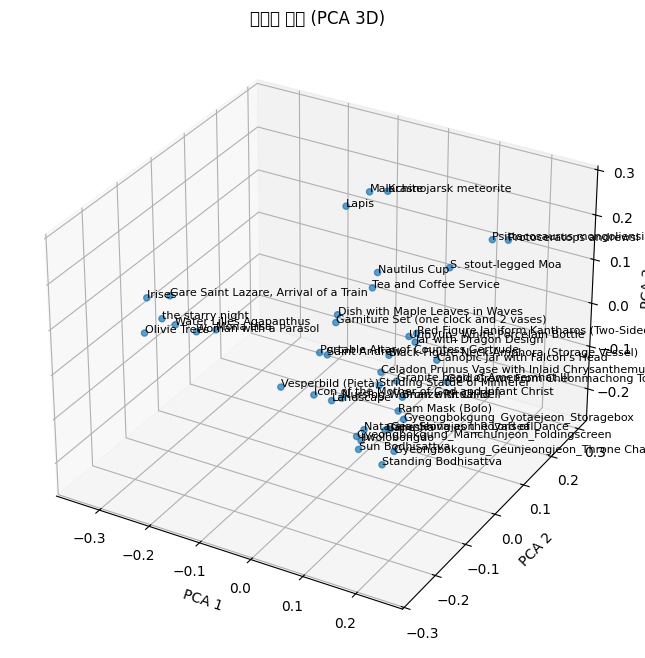

In [18]:
if __name__ == "__main__":
    # CSV 파일 경로 (실제 파일 경로에 맞게 수정)
    csv_path = '/home/usr/Desktop/recnav/gpt/item_concat.csv'
    df_embedded = load_csv_and_generate_embeddings(csv_path)
    print("임베딩 생성 완료. DataFrame 미리보기:")
    print(df_embedded.head())
    
    # 2D 시각화 실행
    plot_2d_embeddings(df_embedded)
    
    # 3D 시각화 실행
    plot_3d_embeddings(df_embedded)